## Handling Missing Data

1. Remove the row which contains missing values

2. Impute the data (fill the data) by Univariate or Multivariate

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
# Missing value percentage in each column.

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [11]:
cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 
        and df[col].isnull().mean() > 0]


In [12]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
162,0.920,no_enrollment,Graduate,20.0,33.0
1175,0.920,no_enrollment,Graduate,18.0,12.0
13511,0.624,no_enrollment,Masters,20.0,23.0
8955,0.624,no_enrollment,Graduate,7.0,109.0
16789,0.910,Full time course,Phd,14.0,26.0


In [15]:
# checking 

len(df[cols].dropna()) /len(df)



0.8968577095730244

After removing null values we will be left with only 89% of the data.

In [16]:
new_df = df[cols].dropna()

In [17]:
df.shape , new_df.shape

((19158, 13), (17182, 5))

we will check for values being Missing Completely At Random (MCAR)

In [19]:
import matplotlib.pyplot as plt

<Axes: >

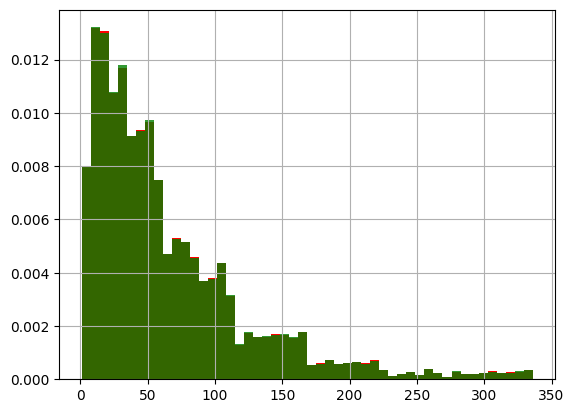

In [23]:
# We will plot histogram to verify the fact

fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50, ax=ax,density=True,
                          color='red')

new_df['training_hours'].hist(bins=50,ax=ax,color='green',
                              density=True,alpha=0.8)



<Axes: >

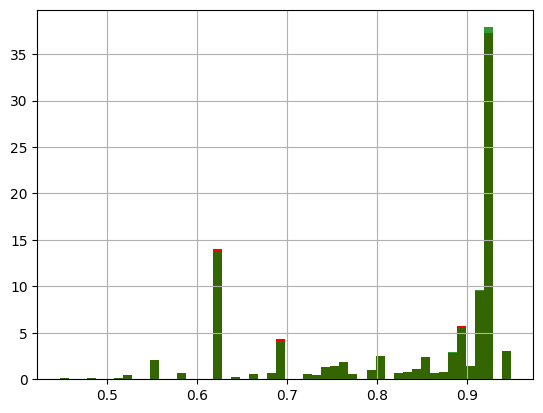

In [24]:
# We will plot histogram to verify the fact

fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, ax=ax,density=True,
                          color='red')

new_df['city_development_index'].hist(bins=50,ax=ax,color='green',
                              density=True,alpha=0.8)



<Axes: >

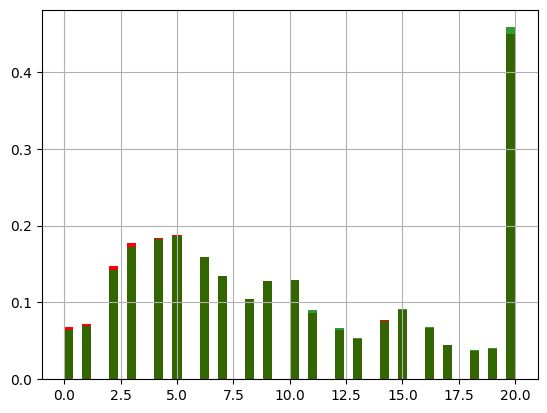

In [25]:
# We will plot histogram to verify the fact

fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax,density=True,
                          color='red')

new_df['experience'].hist(bins=50,ax=ax,color='green',
                              density=True,alpha=0.8)



As the bars are almost overlapping eachother in every case then the Missing Value is Completely At Random

In [26]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

When dealing with Categorical Data we will check that the categories or the classes in the column has same ratio before and after the CCA, then it would be beneficial.